<a href="https://colab.research.google.com/github/yihong1011/TibameML/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 整理資料/資料預處理
# pandas兩個型態: DataFrame(表格, 2D)/Series(一行/一列, 1D)
# 資料的量到底要多少才夠?
# 看你的問題的難易度來決定(簡單: 少一點 難: 多一點) 欄位數量(少: 簡單 多: 難)
# ML: 千-萬  DL: 萬-十萬
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
df['ans'] = boston['target']
df.to_csv('boston.csv', encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
import numpy as np
x = np.array(df.drop(['ans'], axis=1))
y = np.array(df["ans"])

In [ ]:
test = pd.DataFrame([
    [1, 2],
    [3, 4]          
], columns=["a", "b"], index=["a", "b"])
test.drop("a", axis=1)

from sklearn.model_selection import train_test_split
train_test_split(
    [
     [5.1, 3.5, 1.4, 0.2],
     [4.9, 3. , 1.4, 0.2],
     [4.7, 3.2, 1.3, 0.2],
     [4.6, 3.1, 1.5, 0.2]],
      ["a", "b", "c", "d"], test_size=0.5)

[[[4.6, 3.1, 1.5, 0.2], [5.1, 3.5, 1.4, 0.2]],
 [[4.7, 3.2, 1.3, 0.2], [4.9, 3.0, 1.4, 0.2]],
 ['d', 'a'],
 ['c', 'b']]

In [ ]:
# 切成兩份
# 資料整理/預處理: pandas 機器學習: numpy
import numpy as np
# 型態: numpy array
x = np.array(df.drop(["ans"], axis=1))
y = np.array(df["ans"])

In [ ]:
# 大部分人會9:1/8:2切
from sklearn.model_selection import train_test_split
# [90%x, 10%x, 90%y, 10%y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [44, 47, 44]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 91\nvalue = [0, 47, 44]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.177\nsamples = 51\nvalue = [0, 46, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = virginica')]

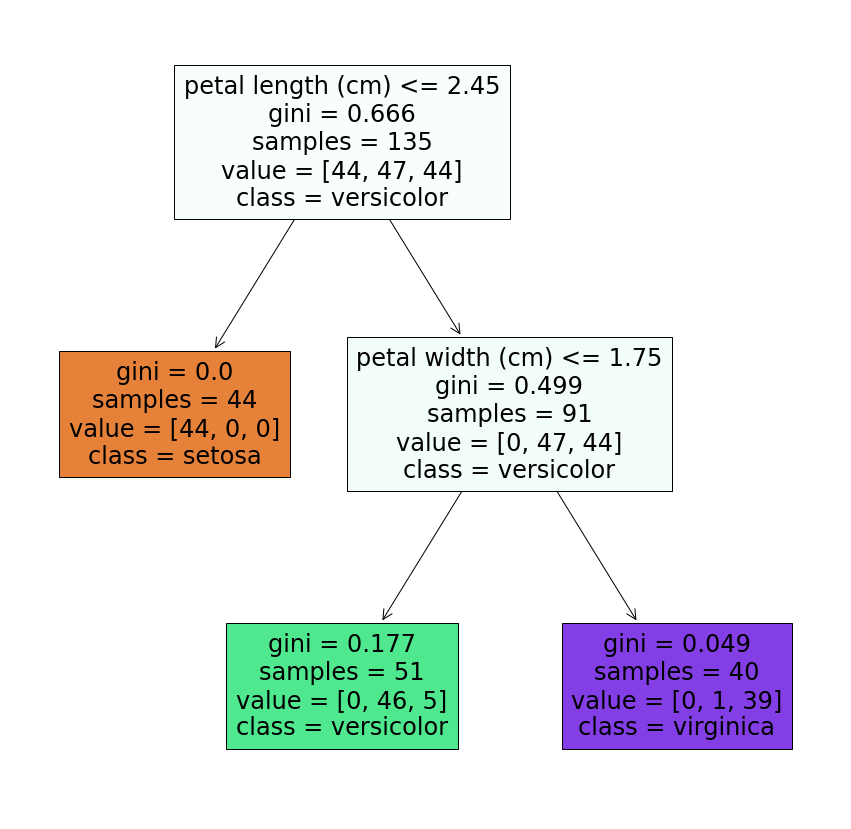

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(clf,
          feature_names=boston["feature_names"],
          class_names=boston["target_names"],
          filled=True)

In [ ]:
((44/135)*(1-(44/135)))+((42/135)*(1-(42/135)))+((49/135)*(1-(49/135)))


0.6652400548696845

In [ ]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

1.0